# HW2: Unsupervised Learning - Clustering

In this homework you will perform Unsupervised learning to cluster a real world dataset. You will define your own functions for plotting the clusters and  evaluating the clustering results. The main objective of this assignment is to learn the process of applying unsupervised learning in a real-world dataset from pre-processing, dimensionality reduction and finally clustering. 



##  Grading: 

1. Basic tasks: points  3
2. Advanced tasks: points 2
3. Total points: 5



#### Student information
Please provide your information for automatic grading.

In [3]:
STUD_SUID = 'nyna2000'
STUD_NAME = 'Nyamgarig Naranbaatar'
STUD_EMAIL = 'nyna2000@student.su.se'

## OUTLINE
## Total points: 5
*Basic Tasks 1-5*: 


total points: 3

1. Euclidean and Manhattan distances, points: 0.2
2. Purity metric, points: 0.4
3. Evaluation metrics, points: 0.3
4. Plot clustering, points: 0.4
5. Elbow method, points: 0.4
6. In the breast cancer dataset:

    a. Pre-processing , points: 0.2

    b. Call elbow, points: 0.2

    c. K-means, points: 0.2

    d. K-medoid with Euclidean distance, points: 0.2

    e. Agglomerative Clustering and dendrogram, points: 0.5

 *Advanced Task*:

 6. Implementation of K-medians and K-means, points: 2





### NOTE: Each function you make will be graded, so it is important to strictly follow input and output instructions stated in the skeleton code.


The dataset that you will use in this assignment is the Breast Cancer Dataset which you will download using sklearns dataset module (instructions are provided below):

Information can be found in the link
link: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

It is a  dataset related to breast cancer patients with two classes, 569 samples, 30 attributes and the features are either real or positive.  You can find more information in the above link.


Attribute Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image

-  ID number


-  Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:

-  radius (mean of distances from center to points on the perimeter)


-  texture (standard deviation of gray-scale values)


-  perimeter


-  area

-  smoothness (local variation in radius lengths)


-  compactness (perimeter^2 / area - 1.0)


-  concavity (severity of concave portions of the contour)


-  concave points (number of concave portions of the contour)


- symmetry


- fractal dimension ("coastline approximation" - 1)






In [2]:
import numpy as np 
from sklearn import metrics
import pandas as pd 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
RSTATE = 2 



### ** Whenever you are asked to pass as an input parameter (in a function or algorithm) a random_state you should use the RSTATE as given above. Do not change it. **

## 1. Euclidean-Manhattan

In the function named calculate_distances:

- compute the Euclidean distance between any two given vectors(numpy arrays)

$d_e = \sqrt{\sum_{i=1}^{n}({a_i-b_i})^2}$

- compute the Manhattan distance between any two given vectors(numpy arrays)

$d_m = \sum_{i=1}^{n}{\lvert a_i-b_i \rvert}$ 

(hint: you can use numpy)





In [3]:
def calculate_distances(vector1, vector2, name_of_distance_metric):
    """
    Input:
            vector1, vector2 and the name of the distance metric ("euclidean" or "manhattan")
          
    Output:
            the distance that you calculated
    

    step1: if the name of the distance metric is "euclidean" then store in the output variable the result of the euclidean distance between vector1 and vector2
    step2: if the name of the distance metric is "manhattan" then store in the output variable the result of the manhattan distance between vector1 and vector2
    """
    #write your code here
    import math
    if name_of_distance_metric == "euclidean":
            # according to formula
        distance = math.sqrt(sum([(v1 - v2) ** 2 for v1, v2 in zip(vector1, vector2)]))
    elif name_of_distance_metric == "manhattan":
            # used the formula
        distance = np.sum(np.abs(vector1-vector2))

    return distance

In [4]:
#test your function here using these two arrays.
v1 = np.array((1, 2, 3, 4, 5))
v2 = np.array((7, 8, 9, 4, 2))
euclidean = calculate_distances(v1,v2, "euclidean")
manhattan = calculate_distances(v1,v2, "manhattan")

In [5]:
euclidean 

10.816653826391969

In [6]:
manhattan

21

## 2. Purity

In the function named purity:
- calculate the purity metric for any given clustering result


You can read about purity in the course material or follow this link: https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html



*Hints/One way to solve this:
To calculate Purity first create a confusion matrix (you can call the sklearn's version of the confusion matrix, link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). 
Then from each column select the maximum value, sum them up and finally divide by the total number of data points.*

In [7]:
def purity(y_true, y_predicted):
    """
    Input:
            y_true: true labels, y_predicted: predicted labels 
          
    Output:
            the purity metric


    step1: call sklearn's confusion matrix and store it
    step2: select the max value from each column and store it
    step3: sum up the max values and divide it by the total number of data points. Store it in a variable called purity
    """
    #write your code here

    #Step 1
    #matrix = confusion_matrix(y_true, y_predicted)
    matrix = metrics.cluster.contingency_matrix(y_true, y_pred)

    #Step 2
    purity = np.sum(np.amax(matrix, axis=0)) / np.sum(matrix) 

    return purity 


In [8]:
# If you'd like to test the purity method before moving to question 5, use the following:
# The output of this cell will not be graded and it's not part of the assignment. I just put it here in case you would like to test your method.
y_true = pd.Series([1,1,0,1,0,1,0,1,1])
y_pred = pd.Series([1,0,0,1,0,1,0,1,1])
purity(y_true, y_pred)

0.8888888888888888

## 3. Evaluation Metrics 

In the function named evaluation_metrics:
- calculate silhouette score for any given clustering (sklearn) using random_state = rstate
- call the purity function that you defined above and calculate purity for any given clustering
- store the results in a dataframe. Below you will see an example of how the dataframe of the results should look like (The values in the example are random).

The first column of the dataframe should be called **Metric**, the second column should be called **Value** and the third should be called **Algorithm** and should contain, in each row, the name of the algorithm you are currently running.

example: 


| Metric | Value | Algorithm |
|--------|-------|-----------|
| S_S    | 0.1     | Kmeans    |
| Purity | 0.1     | Kmeans    |




###  **This function is defined here but will be used after task 6(clustering on breast-cancer dataset).**

In [9]:
def evaluation_metrics(X, predicted_labels, metric, algorithm, true_labels, rstate = RSTATE):
    """
    Input:
            X:the dataset, 
            predicted_labels: predicted labels, 
            metric: to calculate silhouette (ex "manhatan" or "euclidean"),
            true_labels: class label, 
            random_state: RSTATE
          
    Output:
            the evaluation metrics dataframe

    step1: calculate silhouette with metric equal to the metric passed in the parameters of the function, random_state = rstate
    step2: call the purity function that you defined above 
    step3: create a dataframe to store the above(named dataframe_with_metrics), with column names ['Metric','Value','Algorithm'] and in each row the name of the algorithm the metric refers to    
    """
    #write your code here
    #Step 1
    ss = metrics.silhouette_score(X, predicted_labels, metric, RSTATE)

    purityz = purity(true_labels, predicted_labels)
    
    # Step 3
    metric_name = "Silhouette"
    
    # Fix this
    value = ss, purityz
    dataframe_with_metrics = list(zip(metric_name, value, algorithm))
    dataframe_with_metrics = pd.DataFrame(dataframe_with_metrics, columns=['Metric','Value','Algorithm'])


    return dataframe_with_metrics

## 4. Plotting the Clusters

In the functon named plot_clusters: 
- Transform the input data calling sklearn's PCA  with 2 principal components and random_state=rstate
- plot the 2 principal components with colors respective to the true labels, **only if** reference_plot==True (plot title: Reference plot)
- plot the 2 principal components with colors respective to the clustering result labels(predicted_labels). The title of the plot should have the name of the algorithm you are currently running 

*if reference_plot == True then the function will return both the Reference plot and the clustering plot. If reference_plot == False then the function will only return the plot of the clustering.*


###  **This function is defined here but will be used after task 6 (clustering on breast-cancer dataset).**

In [10]:
def plot_clusters(data, true_labels, predicted_labels, algorithm, rstate=RSTATE, reference_plot=True):
    """
    Input:      data: the dataset, 
                true_labels: the class of the dataset,
                predicted_labels: the labels predicted by the algorithm,
                algorithm: the name of the algorithm you are currently running (ex "Kmeans"), 
                random_state: RSTATE, 
                reference_plot=True allows you to plot the PCA components with colors respective to the class label



    step1: tranform the input dataset by calling sklearn's pca method (2 principal components and random_state=rstate)
    step2: if reference plot == True, plot the result of PCA with colors respective to the true labels
            title(Reference plot)
    """
    #write your code here
    # Step 1
    pca = PCA(n_components=2, random_state=rstate)
    pca_2d = pca.fit_transform(data)
    
    # Step 2

    if reference_plot=True:
            plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=true_labels)
            plt.title("Reference plot")
            plt.show()
    
    
        
    """
    step 3: plot the principal components with colors equal to the predicted labels of the algorithm that you are currently running 
            title(the name of the algorithm that you are currently running)
    
    
    Hint:
            check the str.format() to pass the appropriate name of the algorithm each time
    """
    #write your code here
    import plotly.express as px
    fig = px.scatter(pca_2d, )




    plt.show()


SyntaxError: invalid syntax (<ipython-input-10-801e0c1a5971>, line 23)

## 5. Elbow Method

In the function named elbow_method:
- calculate the optimal number of clusters using the elbow method, for the k-means algorithm. 
- plot the result of the elbow method


Specifically for the plot:

- x-axis: the number of clusters
- y-axis: inertia


In [28]:
def elbow_method(X, max_range_for_elbow, rstate=RSTATE):
    """
    Input: 
        X:the dataset, 
        max_range_for_elbow:the max number of clusters you want the elbow method to run, 
        random_state: RSTATE. 

    step1: 
        store in K, a sequence of numbers from 1 to max_range_of_elbow+1
    step2: 
        create an empty list where you will store the inertia
    step3:
        in a for loop that goes through the values of K one by one, run Kmeans for each of these values with random_state=rstate
    step4: 
        calculate the inertia(it's stored as an attribure in Kmeans object) of each clustering and store it in the list from step 2
    step5: 
        plot the resulting elbow, in x-axis: the number of clusters and in y-axis: the inertia
    """

    #write your code here
    
    #Step 1
    K = range(1, max_range_for_elbow+1)
    #Step 2
    inertia = []
    #Step 3
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=rstate)
        #Step 4
        kmeans.fit_predict(X)
        inertia.append(kmeans.inertia_)


    #Step 5
    plt.figure()
    plt.plot(K, inertia)

    plt.title('The Elbow method showing the optimal k')
    plt.show()

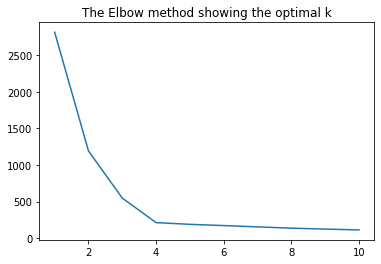

In [29]:
# If you'd like to test the elbow method before moving to question 5, use this synthetic dataset:
# The output of this cell will not be graded and it's not part of the assignment. I just put it here in case you would like to test your method.

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

elbow_method(X,10)

## 6. Clustering on the breast-cancer dataset

In [30]:
##loading the breast cancer dataset from sklearn

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data["data"]
y = data["target"]
feature_names = data["feature_names"]

data = pd.DataFrame(data=X, columns=feature_names)

In [31]:
#this is how the dataset looks like
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
#the class, Malignant:0, Bening:1
# Class label = outcome
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### a. Data pre-processing

In the function named data_preprocessing:

- standardize the numerical data
- store the standardized data in a dataframe called data_standardized with the respective column names


In [33]:
def data_preprocessing(data):
    """
    Input: 
        the dataset
    Output: 
        the standardized dataset

    step1: 
        use the StandardScaler() from sklearn and transform the data
    step1: 
        store the standardized data in a dataframe called data_standardized with the respective feature names

    """
    # Step 1
    scaler = StandardScaler()

    #Step 2
    data_standardized = scaler.fit_transform(data)
    data_standardized = pd.DataFrame(data_standardized, columns=feature_names)

    return data_standardized

In [34]:
#calling the function here:
data_standardized = data_preprocessing(data)

In [35]:
#see the standardized dataset
data_standardized

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### From now on you will use data_standardized unless indicated differently

### b. Elbow K-means 

For this task:
- call the elbow_method that you defined above(Question 5) for the standardized dataset and max_range_for_elbow equal to 10 
- Store in the variable: optimal_number_of_clusters_6b the optimal number of clusters according to the elbow method 

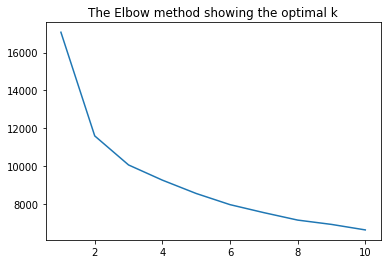

In [36]:
#call the elbow method for the standardized dataset with max_range_for_elbow = 10 
elbow_method(data_standardized, max_range_for_elbow=10)

In [37]:
#What's the optimal number of clusters(for data_standardized) for Kmeans according to the elbow method?
optimal_number_of_clusters_6b = 2

### c. Apply K-means with the optimal number of clusters

For this task:
- apply again K-means with the optimal number of clusters that you found above, init = "kmeans++" and random_state=RSTATE
- call the evaluation_metrics function that you defined above(Question 3) to see how good your clustering is, store it in evaluation_metrics_Kmeans
- call the plot_clusters function that you defined above (with reference_plot=True) to visualize your results


In [38]:
#use sklearn to apply Kmeans on the standardized dataset with init kmeans++ and random state = RSTATE
#write your code here
kmeans = KMeans(n_clusters=optimal_number_of_clusters_6b, init="kmeans++", random_state=RSTATE)

In [39]:
#use the evaluation_metrics function that you defined above to see the results of the metrics 
evaluation_metrics_Kmeans = evaluation_metrics(X=data_standardized, predicted_labels=y_pred, metric="euclidean", algorithm="KMeans++", true_labels=y_true, rstate = RSTATE)


ValueError: Found input variables with inconsistent numbers of samples: [569, 9]

In [34]:
#see the results
evaluation_metrics_Kmeans

NameError: name 'evaluation_metrics_Kmeans' is not defined

In [35]:
#use the plot_clusters function to plot the results of Kmeans(with data=data_standardized,true_labels=y,predicted_labels=kmeans.labels_,"Kmeans", reference_plot=True)
#write your code here


### d. K-medoids

In this part:
- apply K-medoids with euclidean distance metric and random_state=RSTATE (from scikit-learn-extra)
- call the evaluation metrics function for the K-medoids clustering, store it in evaluation_metrics_Kmedoids
- visualize the results of K-medoids clustering by calling the plot_clusters function with reference_plot=False



In [36]:
#Cluster the standardizd dataset using Kmedoids with the number of clusters as found by the elbow method, random state = RSTATE and metric="euclidean"
#write your code here


In [37]:
#call the evaluation_metrics function for the K-medoids clustering
evaluation_metrics_Kmedoids = #write your code here


SyntaxError: invalid syntax (<ipython-input-37-1849651bd948>, line 2)

In [38]:
evaluation_metrics_Kmedoids

NameError: name 'evaluation_metrics_Kmedoids' is not defined

In [39]:
##plot the results using the plot_clusters function for Kmedoids with reference_plot=False. That means that you should only print the result of the Kmedoids clustering and not the reference plot.
#write your code here


### e. Agglomerative Clustering  

In the function called agglomerative_clustering:
- cluster the dataset using agglomerative_clustering with linkage=ward, the optimal number of clusters that you found above and keep the default affinity (equals to "euclidean")
- cluster the dataset using agglomerative_clustering with linkage=complete, the optimal number of clusters that you found above and keep the default affinity (equals to "euclidean")
- cluster the dataset using agglomerative_clustering with linkage=average,  the optimal number of clusters that you found above and keep the default affinity (equals to "euclidean")
- for each clustering call the evaluation metrics function and store each result in a different dataframe
- create a dataframe that has all the evaluation metrics together for the three algorithms

In [40]:
def agglomerative_clustering(data,number_of_clusters):
    """
    Input:  
            the standardized dataframe, number_of_clusters to pass as input to the different agglomerative clustering algorithms
    Output: 
            the dataframe with the evaluation metrics for all three algorithms, called result_dataframe
 
    step1: 
            cluster the dataset using agglomerative_clustering with linkage="ward" (sklearn) and n_clusters = number_of_clusters 
    step2:
            call the evaluation_metrics function and store the results in a dataframe called ward_score


    step3: 
            cluster the dataset using agglomerative_clustering with linkage="complete" (sklearn) and and n_clusters = number_of_clusters
    step4:
            call the evaluation_metrics function and store the results in a dataframe called complete_score
    

    step5: 
            cluster the dataset using agglomerative_clustering with linkage=average (sklearn) and n_clusters = number_of_clusters
    step6:
            call the evaluation_metrics function and store the results in a dataframe called average_score

    step7: Use pd.concat to glue together the following dataframes: ward_score, complete_score, average_score (in this order) with axis=0, store it in result_dataframe

    """
    #write your code here









    

    return result_dataframe

In [41]:
number_of_clusters = None #change this to the optimal number of clusters that you found with the elbow method for the breast-cancer dataset
#calling the aggglomerative function here
evaluation_for_agglomerative = agglomerative_clustering(data_standardized, number_of_clusters)

NameError: name 'result_dataframe' is not defined

In [42]:
#see the results
evaluation_for_agglomerative

NameError: name 'evaluation_for_agglomerative' is not defined

### Visualize Agglomerative clustering and plot the dendrogram

For this task:
- create the linkage matrix for the standardized dataset using linkage='ward', from scipy library 
- plot the dendogram using linkage_type as an input parameter the linkage matrix

In [43]:
from scipy.cluster.hierarchy import linkage
linkage_type = 'ward'
#write your code here



## 7. Advanced task: Implementation of K-medians and K-means

In the function called find_clusters_Means_Median:
- implement Kmeans as we saw in the lab (In the lab we chose the first random centers from the dataset samples)
- implement Kmedians

Detailed instructions you will find inside the method

**K-medians:** Instead of taking the mean value of the object in a cluster as a reference point, medians are used (L1-norm as the distance measure)


The K-medians clustering algorithm:


-Select K points as the initial representative objects (For this assignment and in the lab we choose the initial points from the dataset samples)

-Repeat:

    - Assign every point to its nearest median using the L1-norm as the distance measure(manhattan)

    - Re-compute the median of each cluster
    
 Until convergence is satisfied   



 **This method will be similar to the one that we saw in Lab2-Unsupervised Learning. Essentially, you only need to fix the Kmedians!**


In [58]:
def find_clusters_Means_Median(X, n_clusters, rseed=RSTATE, use_Kmedians=True):
    """
    Input:
        X: the dataset to be clustered, 
        n_clusters: the number of clusters you want your algorithm to run with, 
        rseed: RSTATE, 
        use_Kmedians: a variable that lets you run Kmedians if its true
    Output:
        centers: the cluster centers of the algorithm you are currently running, labels: the clustering labels

    step 1: generate a random number using np.random.RandomState and with the seed provided in parameters
    step 2: randomly permutate the input dataframe and get the position of the first x elements where x equals to the n_clusters. store in i
    step 3: store in  centers the elements with position i, from the original dataframe X. These are going to be your random initial centers

    step 4: while the new_centers (from step 6) are not equal to the centers (from step 3) repeat:

    step 5: if use_Kmedians == True--> assign each point to the nearest centers (the ones from step 3) using the L1-norm as the distance measure(manhattan) and store it in labels 
    step 6: update the centers *of each cluster* using the median and store in new_centers
    step 7: if use_Kmedians == False--> assign each point to the nearest centers (the ones from step 3) using the L2-norm as the distance measure(euclidean) and store it in labels 
    step 8: update the centers *of each cluster* using the mean and store it in new_centers
    """

    #write your code here
    #Step 1
    rng = np.random.RandomState(rseed)

    #Step 2
    i = rng.permutation(X.shape[0])[:n_clusters]

    #Step 3
    centers = X[i]

    #Step 4
    while True:

        if use_Kmedians == True:
            labels = pairwise_distances_argmin(X, centers, metric='manhattan')
        elif use_Kmedians == False:
            labels = pairwise_distances_argmin(X, centers, metric='euclidean')


        new_centers = np.array(
            
            # if Kmedian => np.median(X[labels==i], 0) 
        
            # if KMeans => [X[labels == i].mean(0)
                                for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

In [59]:
centers, labels = find_clusters_Means_Median(use_Kmedians=False, X= data_standardized.values, n_clusters= number_of_clusters)
# evaluation_for_Kmeans = evaluation_metrics(data_standardized, labels, "euclidean", "Kmeans", y)


TypeError: 'NoneType' object cannot be interpreted as an integer

In [71]:
evaluation_for_Kmeans

NameError: name &#39;evaluation_for_Kmeans&#39; is not defined

In [75]:
plot_clusters(data_standardized,y,labels,"Kmeans", reference_plot=True)

NameError: name 'plot_clusters' is not defined

In [76]:
centers, labels = find_clusters_Means_Median(data_standardized.values, number_of_clusters, use_Kmedians=True)
evaluation_for_Kmedians=evaluation_metrics(data_standardized, labels, "manhattan", "Kmedians", y)

NameError: name 'data_standardized' is not defined

In [77]:
evaluation_for_Kmedians

NameError: name 'evaluation_for_Kmedians' is not defined

In [78]:
plot_clusters(data_standardized,y,labels,"Kmedians", reference_plot= False)

NameError: name 'plot_clusters' is not defined